In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data Injection

In [14]:
# Read csv file
data = pd.read_csv("possum.csv")
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


### Preliminary Data Analysis

In [30]:
data.describe(include='all').round(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.00,104.00,104,104,104.00,104.00,104.00,104.00,104.00,103.00,104.00,104.00,104.00,104.00
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,other,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,58,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52.50,3.62,NaN,NaN,3.83,92.60,56.88,87.09,37.01,68.46,48.13,15.05,27.00,32.59
std,30.17,2.35,NaN,NaN,1.89,3.57,3.11,4.31,1.96,4.40,4.11,1.05,2.05,2.76
min,1.00,1.00,NaN,NaN,1.00,82.50,50.00,75.00,32.00,60.30,40.30,12.80,22.00,25.00
25%,26.75,1.00,NaN,NaN,2.75,90.68,54.98,84.00,35.88,64.60,44.80,14.40,25.50,31.00
50%,52.50,3.00,NaN,NaN,3.00,92.80,56.35,88.00,37.00,68.00,46.80,14.90,27.00,32.50
75%,78.25,6.00,NaN,NaN,5.00,94.72,58.10,90.00,38.00,72.50,52.00,15.72,28.00,34.12


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [35]:
data.nunique()

case        104
site          7
Pop           2
sex           2
age          10
hdlngth      71
skullw       64
totlngth     34
taill        19
footlgth     75
earconch     69
eye          35
chest        19
belly        24
dtype: int64

In [18]:
data.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

### Data Cleaning

It is noticeable from the data that there are 2 missing values in the age and one missing value in the footlenght. <br>
I will fill the age column with the mean because my analysis is to be done on the age

In [ ]:
# Filling the missing age with the mean
data['age'].fillna(data["age"].mean(), inplace=True)
data.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

### Descriptive Data Analysis

In [37]:
# Counting and grouping the data 
grp = data[["Pop", "age", "taill"]].value_counts()
grp

Pop    age  taill
other  3.0  38.0     6
       1.0  36.5     4
       3.0  38.5     4
       4.0  36.5     3
       6.0  38.0     3
                    ..
       5.0  41.0     1
       6.0  36.0     1
            35.0     1
       7.0  35.5     1
            43.0     1
Name: count, Length: 74, dtype: int64

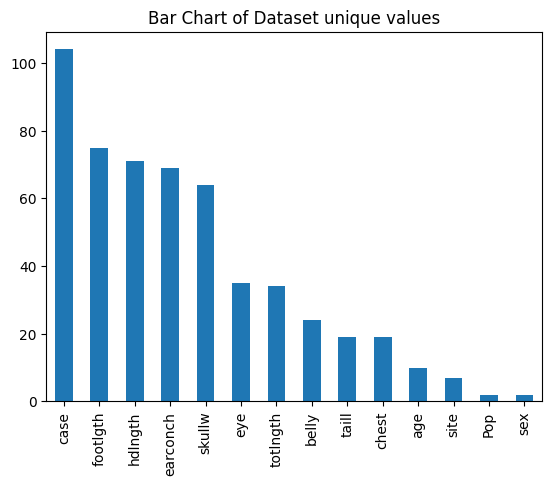

In [44]:
data.nunique().sort_values(ascending=False).plot(kind='bar')
plt.title("Bar Chart of Dataset unique values")
plt.show()

In [53]:
data.groupby(['sex', 'Pop'])[['taill', 'skullw']].describe()

taill                                                          \
          count       mean       std   min     25%    50%     75%   max   
sex Pop                                                                   
f   Vic    24.0  36.333333  1.868891  32.0  35.000  36.25  37.625  39.5   
    other  19.0  38.078947  1.250146  36.0  38.000  38.00  38.500  41.0   
m   Vic    22.0  35.500000  1.455695  32.0  34.625  35.50  36.000  39.5   
    other  39.0  37.756410  1.905228  34.0  36.500  38.00  38.250  43.0   

          skullw                                                        
           count       mean       std   min    25%   50%     75%   max  
sex Pop                                                                 
f   Vic     24.0  56.645833  2.878251  51.5  55.30  56.3  57.300  67.7  
    other   19.0  56.515789  2.191211  52.0  55.40  56.4  58.000  59.9  
m   Vic     22.0  56.663636  2.234693  51.5  55.10  56.4  58.425  60.4  
    other   39.0  57.333333  3.985852  50.0  54.75  56.3  59.400  68.6

In [54]:
data.groupby('sex')['taill'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,43.0,37.10,1.83,32.0,36.0,37.5,38.25,41.0
m,61.0,36.94,2.06,32.0,35.5,36.5,38.00,43.0


In [55]:
data.groupby('sex')['skullw'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,43.0,56.59,2.57,51.5,55.2,56.4,57.65,67.7
m,61.0,57.09,3.45,50.0,54.8,56.3,59.00,68.6


In [51]:
data.groupby('sex')['sex'].describe()

,count,unique,top,freq
sex,,,,
f,43,1,f,43
m,61,1,m,61


In [79]:
for gender in ['m', 'f']:
    sex = data[data['sex'] == gender]
    print(f"\n{gender} Possiums (number={len(sex)})")
    print("  Tail width in mm:")
    print(f"    Mean: {sex['taill'].mean():.1f} mm")
    print(f"    Median: {sex['taill'].median():.1f} mm")
    print(f"    Variance: {sex['taill'].var():.1f} mm")
    print(f"    Standard Deviation: {sex['taill'].std():.1f} mm")

    cv = sex['taill'].std() / sex['taill'].mean()
    cv_perc = cv * 100

    print("     Coefficient of Variation:", cv.round(2))
    print("     Relative Spread:", round(cv_perc))

    

    print(f"\n{gender} Possiums (n={len(sex)})")
    print("  Skull Width in mm:")
    print(f"    Mean: {sex['skullw'].mean():.1f} mm")
    print(f"    Median: {sex['skullw'].median():.1f} mm")
    print(f"    Variance: {sex['skullw'].var():.1f} mm")
    print(f"    Standard Deviation: {sex['skullw'].std():.1f} mm")
    cv = sex['skullw'].std() / sex['skullw'].mean()
    cv_perc = cv * 100

    print("     Coefficient of Variation:", cv.round(2))
    print("     Relative Spread:", round(cv_perc))



m Possiums (number=61)
  Tail width in mm:
    Mean: 36.9 mm
    Median: 36.5 mm
    Variance: 4.2 mm
    Standard Deviation: 2.1 mm
     Coefficient of Variation: 0.06
     Relative Spread: 6

m Possiums (n=61)
  Skull Width in mm:
    Mean: 57.1 mm
    Median: 56.3 mm
    Variance: 11.9 mm
    Standard Deviation: 3.5 mm
     Coefficient of Variation: 0.06
     Relative Spread: 6

f Possiums (number=43)
  Tail width in mm:
    Mean: 37.1 mm
    Median: 37.5 mm
    Variance: 3.4 mm
    Standard Deviation: 1.8 mm
     Coefficient of Variation: 0.05
     Relative Spread: 5

f Possiums (n=43)
  Skull Width in mm:
    Mean: 56.6 mm
    Median: 56.4 mm
    Variance: 6.6 mm
    Standard Deviation: 2.6 mm
     Coefficient of Variation: 0.05
     Relative Spread: 5


**Analysis and interpetation of the result gotten**

Total number of Male Possium = 61


Total number of Female Possium = 43

**Tail Width**

| Metric      | Male Possium | Female Possium | Interpretation|
|-------------|-------------|-------------|----------------------|
| **Mean** | 36.9 cm | 37.1 cm  | This shows that the average tail width of female Possium is just 0.5% greater than a male possium tail width|
| **Median**  |36.5 cm | 37.5 cm  | The female possium and the male possium have tail width median not greater than 40|
| **Variance**  |4.2 cm  | 3.4 cm  | The variance between the male possum width and female possium width is not up to 1|
| **Std Dev** | 2.1 cm   |  1.8 cm  ||
| **Coeff of Variation**| 0.06 | 0.05 | |
| **Relative Spread**| 6 | 5 | |


**Skull Width**

| Metric      | Male Possium | Female Possium |
|-------------|-------------|-------------|
| **Mean** | 57.1 mm | 56.6 mm  |
| **Median**  |56.3 mm  | 56.4 mm  |
| **Variance**  |11.9 mm  | 6.6 mm  |
| **Std Dev** | 3.5 mm   |  2.6 mm  |
| **Coeff of Variation**| 0.06 | 0.05 | |
| **Relative Spread**| 6 | 5 | |

